In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2

comic = pd.read_csv('/Users/Michela/Documents/Kaggle/marvel-wikia-data.csv')

In [2]:
comic.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [3]:
comic = comic.drop('urlslug',1);
comic = comic.drop('page_id',1)

In [4]:
comic.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [5]:
comic.describe()

,APPEARANCES,Year
count,15280.000000,15561.000000
mean,17.033377,1984.951803
std,96.372959,19.663571
min,1.000000,1939.000000
25%,1.000000,1974.000000
50%,3.000000,1990.000000
75%,8.000000,2000.000000
max,4043.000000,2013.000000


In [6]:
comic.hist('Year', bins=100);
comic.hist('APPEARANCES', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a13853b70>]],
      dtype=object)

In [7]:
import matplotlib.pyplot as plt

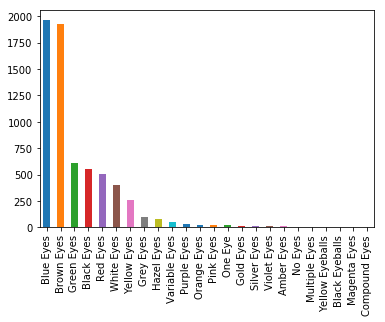

In [8]:
pd.value_counts(comic['EYE']).plot.bar()

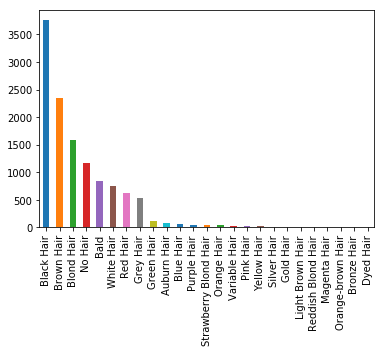

In [9]:
pd.value_counts(comic['HAIR']).plot.bar()

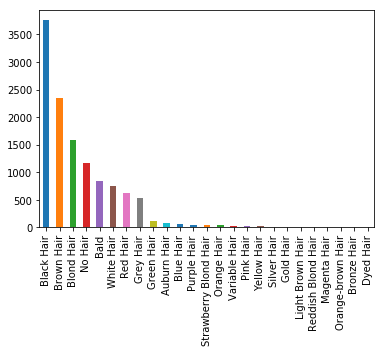

In [10]:

pd.value_counts(comic['HAIR']).plot.bar()

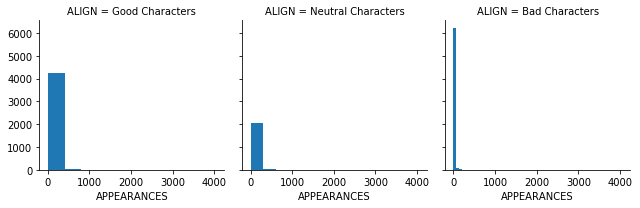

In [11]:
import seaborn as sns
g = sns.FacetGrid(comic, col="ALIGN")

w = g.map(plt.hist, "APPEARANCES")



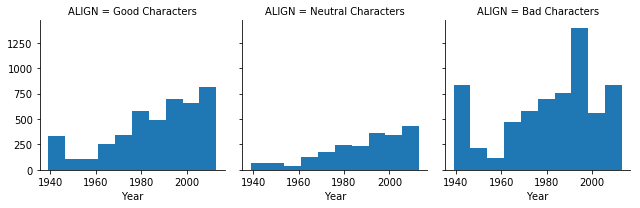

In [13]:
g = sns.FacetGrid(comic, col="ALIGN")
g = g.map(plt.hist, "Year")



In [14]:
#seperate the data into good, bad, neutral

good = comic[comic['ALIGN'].str.contains("Good Characters", na=False)]
bad = comic[comic['ALIGN'].str.contains("Bad Characters", na=False)]
neutral = comic[comic['ALIGN'].str.contains("Neutral Characters", na=False)]

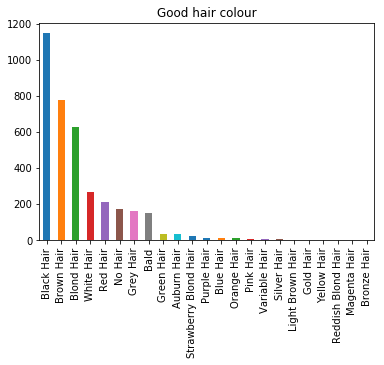

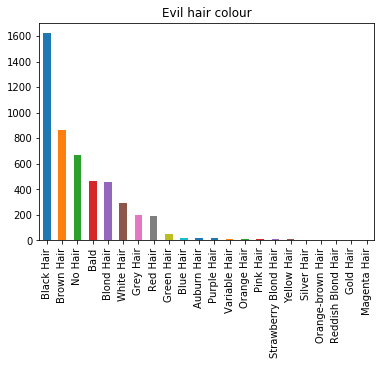

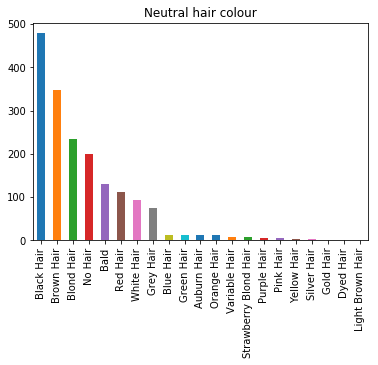

In [50]:
import warnings
warnings.filterwarnings('ignore')

good_hair = plt.figure(1);
pd.value_counts(good['HAIR']).plot.bar(title="Good hair colour"); good_hair.show()
evil_hair = plt.figure(2);
pd.value_counts(bad['HAIR']).plot.bar(title="Evil hair colour"); evil_hair.show()
neutral_hair = plt.figure(3);
pd.value_counts(neutral['HAIR']).plot.bar(title="Neutral hair colour"); neutral_hair.show()


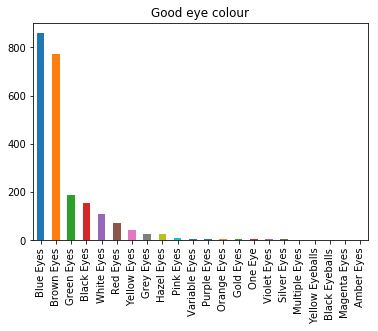

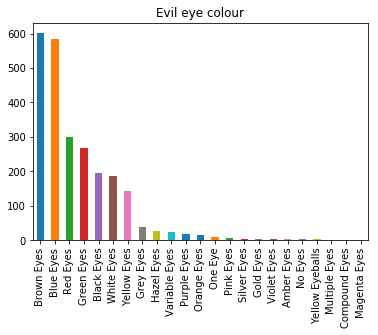

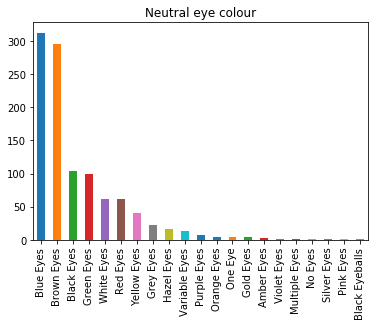

In [51]:
good_eyes = plt.figure(1);
pd.value_counts(good['EYE']).plot.bar(title="Good eye colour"); good_eyes.show()
evil_eyes = plt.figure(2);
pd.value_counts(bad['EYE']).plot.bar(title="Evil eye colour"); evil_eyes.show()
neutral_eyes = plt.figure(3);
pd.value_counts(neutral['EYE']).plot.bar(title="Neutral eye colour"); neutral_eyes.show()



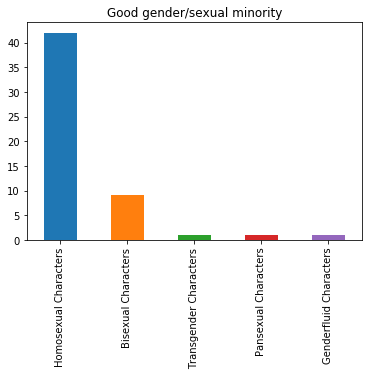

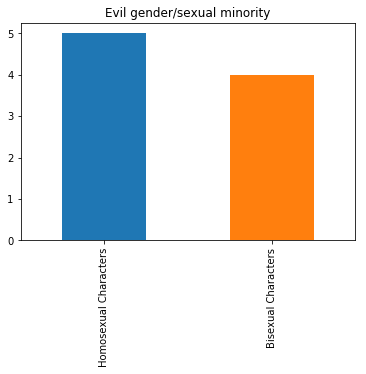

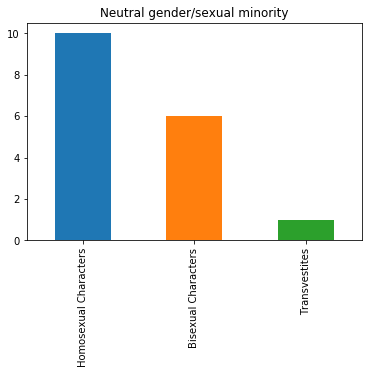

In [52]:
good_gsm = plt.figure(1);
pd.value_counts(good['GSM']).plot.bar(title="Good gender/sexual minority"); good_gsm.show()
evil_gsm = plt.figure(2);
pd.value_counts(bad['GSM']).plot.bar(title="Evil gender/sexual minority"); evil_gsm.show()
neutral_gsm = plt.figure(3);
pd.value_counts(neutral['GSM']).plot.bar(title="Neutral gender/sexual minority"); neutral_gsm.show()




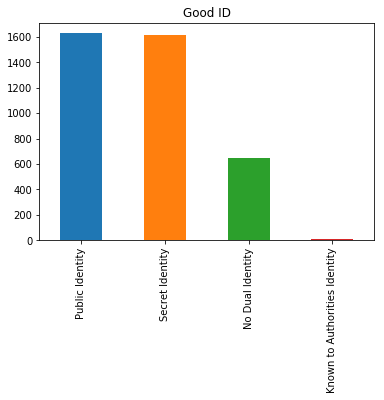

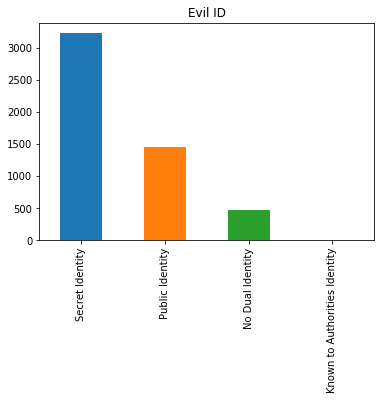

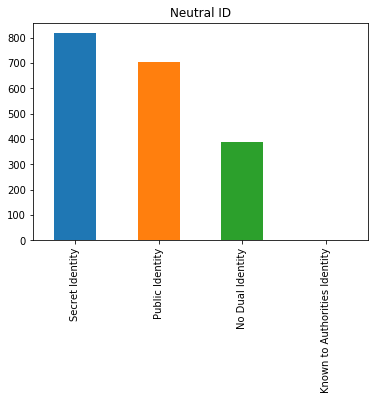

In [53]:
good_id = plt.figure(1);
pd.value_counts(good['ID']).plot.bar(title="Good ID"); good_id.show()
evil_id = plt.figure(2);
pd.value_counts(bad['ID']).plot.bar(title="Evil ID"); evil_id.show()
neutral_id = plt.figure(3);
pd.value_counts(neutral['ID']).plot.bar(title="Neutral ID"); neutral_id.show()



In [ ]:
#question - based on physical characteristics, can we tell the fate of a superhero?
#Will they be evil or good? Will they have a secret ID? Can appearance determine if they will live or die?

#Start with basic classification techniques

#what are our X variables - hair, eye, GSM, Year, Identity
#what are our Y variables - ALIGN to start





In [15]:
#get dummy variables

hair = pd.get_dummies(comic['HAIR'])
eyes = pd.get_dummies(comic['EYE'])
id_type = pd.get_dummies(comic['ID'])
align = pd.get_dummies(comic['ALIGN'])
sex = pd.get_dummies(comic['SEX'])

comic_clean = comic
comic_clean = comic_clean.join([eyes, hair, id_type, align, sex])
comic_clean = comic_clean.drop(['ALIGN', 'HAIR', 'EYE', 'ID', 'name', 'SEX'], axis=1)

In [21]:

comic_clean.shape;
list(comic_clean);

In [22]:
comic_clean.head()

,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,Amber Eyes,Black Eyeballs,Black Eyes,Blue Eyes,Brown Eyes,...,No Dual Identity,Public Identity,Secret Identity,Bad Characters,Good Characters,Neutral Characters,Agender Characters,Female Characters,Genderfluid Characters,Male Characters
0,NaN,Living Characters,4043.0,Aug-62,1962.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,NaN,Living Characters,3360.0,Mar-41,1941.0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,NaN,Living Characters,3061.0,Oct-74,1974.0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,NaN,Living Characters,2961.0,Mar-63,1963.0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,NaN,Living Characters,2258.0,Nov-50,1950.0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1


In [32]:
#initialize the predictors
predictors = comic_clean.iloc[:,6:65]
y=comic_clean['APPEARANCES']


False

In [38]:
y.mean()

17.033376963350786

In [48]:
np.where(np.isnan(y))


(array([], dtype=int64),)

In [47]:
y = y.fillna(y.mean())

In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import linear_model

lm = linear_model.LinearRegression()

In [122]:
reg = lm.fit(predictors, y)



In [78]:
pd.DataFrame(list(zip(predictors.columns, lm.coef_)), columns=['Features', 'Estimated Coefficients'])

#can now predict the number of appearances based on appearance

#how to wrap this?  

,Features,Estimated Coefficients
0,Black Eyeballs,288.925348
1,Black Eyes,4.754781
2,Blue Eyes,40.954621
3,Brown Eyes,20.388592
4,Compound Eyes,5.241005
5,Gold Eyes,88.948816
6,Green Eyes,29.733262
7,Grey Eyes,41.289076
8,Hazel Eyes,95.453414
9,Magenta Eyes,23.207211


In [116]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()






In [124]:
model = make_pipeline(lm)
model2 = make_pipeline(Lasso(alpha=0.1))

In [125]:
model2.results =lasso_model.fit(predictors, y)


In [128]:
pd.DataFrame(list(zip(predictors.columns, lm.coef_, lasso_model.coef_)), columns=['Features', 'Estimated Coefficients', 'Lasso coefficients'])

#can now predict the number of appearances based on appearance

#which has the better predictive power?

#would need to split data into training and testing datasets
#then 

,Features,Estimated Coefficients,Lasso coefficients
0,Black Eyeballs,288.925348,0.000000
1,Black Eyes,4.754781,-0.000000
2,Blue Eyes,40.954621,27.668416
3,Brown Eyes,20.388592,6.167441
4,Compound Eyes,5.241005,-0.000000
5,Gold Eyes,88.948816,0.000000
6,Green Eyes,29.733262,0.000000
7,Grey Eyes,41.289076,0.000000
8,Hazel Eyes,95.453414,0.000000
9,Magenta Eyes,23.207211,0.000000


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size=0.2)